In [18]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import sys
import time
import progressbar



In [19]:
X = []
y = []
#Import Pulsar dataset from csv
with open("pulsar_stars.csv") as csv_file:
    csv_read = csv.reader(csv_file, delimiter = ',')
    for line in csv_read:
        #print(line)
        feat = []
        binClass = []
        i = 0
        while i<len(line):
            #print(line[i],i)
            if i == 8:
                num = float(line[i])
                #print(num)
                binClass.append(num)
            else:
                num = float(line[i])
                feat.append(num)
            i+=1

        X.append(feat)
        y.append(binClass)

        

#print(X[1])
#print(y[1])
#print(y)

y = np.reshape(y,len(y))

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(xTrain)
scaler.transform(xTest)

array([[-0.34269573, -0.11551309, -0.23135075, ..., -0.61548421,
         0.26560613,  0.11454169],
       [ 0.35138409,  0.7622068 , -0.30542223, ..., -0.34166599,
        -0.07579997, -0.29323244],
       [-0.08808812,  1.67564256, -0.07648268, ..., -0.35218699,
         0.22152365, -0.0957837 ],
       ...,
       [-0.32015869,  0.178451  , -0.1445089 , ..., -0.40828188,
         0.00903926, -0.22131694],
       [ 1.29550321,  0.32769225, -0.44563297, ...,  0.31189335,
        -0.84101564, -0.79792592],
       [ 0.35838885, -0.31348686, -0.28153636, ..., -0.58037969,
         0.04079771, -0.08576176]])

In [20]:
scores = []
#Define Multilayer Perceptron Model
hyperparam_val = []
hidden_lays = [(4,4,3,2), (7, 4), (8, 3, 2)]
for epoch in range(9):
    if not (epoch == 0):
        for learn_rate in range(8):
            #(hidden units, learning rate, c)
            for num_hid in range(len(hidden_lays)):
                hyperparam_val.append((0.0001*10**learn_rate,100*epoch,num_hid))

bar = progressbar.ProgressBar(maxval=len(hyperparam_val))

count = 0
for param in hyperparam_val:
    #print(param)
    mlp = MLPClassifier(activation='tanh', solver = 'adam', alpha = param[0], hidden_layer_sizes=(8,4,2), max_iter=param[1])
    mlp.fit(xTrain,yTrain)
    #print(sp.get_params())
    yP = mlp.predict(xTest)
    #print(sp.score(X,y))
    #scores.append((param,mlp.score(X,y)))
    score = 0
    for i in range(len(yP)):
        if yTest[i] == yP[i]:
            score += 1
        
    scores.append((param[0], param[1], param[2], (score/len(yP) * 100)))
    
    count += 1
    sys.stdout.flush()
    bar.update(count)
    
bar.finish()



/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
N/A% (0 of 192) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
  1% (2 of 192) |                        | Elapsed Time: 0:00:03 ETA:   0:05:20/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
  2% (4 of 192) |                        | Elapsed Time: 0:00:09 ETA:   0:08:50/anaconda3/lib/p

In [21]:
scores2 = []
bar = progressbar.ProgressBar(maxval=len(hyperparam_val))

count = 0
for param in hyperparam_val:
    #print(param)
    mlp2 = MLPClassifier(activation='tanh', solver = 'lbfgs', alpha = param[0], hidden_layer_sizes=(8,4,2), max_iter=param[1])
    mlp2.fit(xTrain,yTrain)
    #print(sp.get_params())
    yP = mlp2.predict(xTest)
    #print(sp.score(X,y))
    #scores.append((param,mlp.score(X,y)))
    score = 0
    for i in range(len(yP)):
        if yTest[i] == yP[i]:
            score += 1
        
    scores2.append((param[0], param[1], param[2], (score/len(yP) * 100)))
    
    count += 1
    sys.stdout.flush()
    bar.update(count)
    
bar.finish()




100% (192 of 192) |######################| Elapsed Time: 0:04:10 Time:  0:04:10


In [28]:
max = 0
maxInfo1 = ()
for score in scores:
    if score[3] > max:
        max = score[3]
        maxInfo1 = score

print(maxInfo1)


max = 0
maxInfo2 = ()
for score in scores:
    if score[3] > max:
        max = score[3]
        maxInfo2 = score

print(maxInfo2)



(0.1, 300, 0, 98.5195530726257)
(0.1, 300, 0, 98.5195530726257)


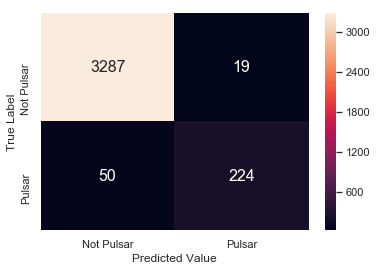

In [29]:
bestMLP1 = MLPClassifier(alpha = maxInfo1[0],hidden_layer_sizes=hidden_lays[maxInfo1[2]],max_iter= maxInfo1[1])
bestMLP1.fit(xTrain, yTrain)
yP1 = bestMLP1.predict(xTest)
conMat1 = confusion_matrix(yTest, yP1)
df_cm = pd.DataFrame(conMat1, ['Not Pulsar', 'Pulsar'],['Not Pulsar', 'Pulsar'])
sn.set(font_scale=1)#for label size
ax = sn.heatmap(df_cm, annot=True,fmt= 'd',annot_kws={"size": 16})# font size
ax.set(xlabel = 'Predicted Value', ylabel = 'True Label')
plt.show()


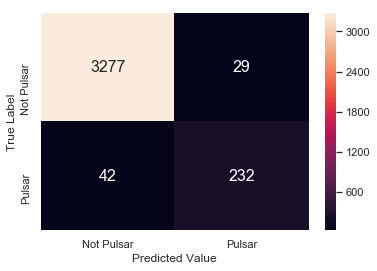

In [30]:
bestMLP2 = MLPClassifier(alpha = maxInfo2[0],hidden_layer_sizes=hidden_lays[maxInfo2[2]],max_iter= maxInfo2[1])
bestMLP2.fit(xTrain, yTrain)
yP2 = bestMLP2.predict(xTest)
conMat2 = confusion_matrix(yTest, yP2)
df_cm = pd.DataFrame(conMat2, ['Not Pulsar', 'Pulsar'],['Not Pulsar', 'Pulsar'])
sn.set(font_scale=1)#for label size
ax = sn.heatmap(df_cm, annot=True,fmt= 'd',annot_kws={"size": 16})# font size
ax.set(xlabel = 'Predicted Value', ylabel = 'True Label')
plt.show()

In [32]:
baggedMLP1 = BaggingClassifier(base_estimator= bestMLP1, n_estimators= 15, max_samples= 500, max_features= 8, bootstrap= True)
baggedMLP1.fit(xTrain,yTrain)
print('Bagged Accuracy:',baggedMLP1.score(xTest,yTest))

baggedMLP2 = BaggingClassifier(base_estimator= bestMLP2, n_estimators= 15, max_samples= 500, max_features= 8, bootstrap= True)
baggedMLP2.fit(xTrain,yTrain)
print('Bagged Accuracy:',baggedMLP2.score(xTest,yTest))
#sequencedSp = BaggingClassifier(base_estimator= adaSP, n_estimators= 15, max_samples= 500, max_features= 8, bootstrap= True)
#sequencedSp.fit(X,y)
#print('Sequenced Accuracy:', sequencedSp.score(X,y))




/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

Bagged Accuracy: 0.970391061452514


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

Bagged Accuracy: 0.9664804469273743


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
print("hi")

hi
